## HOUSE PRICE PREDICTION


## OBJECTIVE
* To Develop a Machine Learning model which can predict the price of  house by using respective input features. 

In [66]:
# Importing all required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

## importing dataframe
df=pd.read_csv("train.csv")
df

In [3]:
# Checking shape of dataframe
df.shape

(29451, 12)

In [4]:
# UNDERSTANDING FIRST FIVE ROWS
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
# UNDERSTANDING FIRST FIVE ROWS
df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [6]:
# BASIC INFORMATION OF ALL COLUMNS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
# STATISTICAL SUMMARY OF ALL NUMERICAL COLUMNS
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


### DATA PREPROCESSING
#### Data Cleaning

In [8]:
# CHECKING NULL VALUES
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [9]:
# CHECKING DUPLICATES
df.duplicated().sum()

401

In [10]:
# DROPPING DUPLICATES VALUES
df =df.drop_duplicates()

In [11]:
# RE_CHECKING DUPLICATES AFTER DROPPING
df.duplicated().sum()

0

In [12]:
# CHECKING DATA TYPES
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

### DATA ENCODING


In [13]:
df["POSTED_BY"].value_counts()

Dealer     17961
Owner      10470
Builder      619
Name: POSTED_BY, dtype: int64

In [14]:
# ONEHOTENCODING
OHE = OneHotEncoder()

In [15]:
df=pd.get_dummies(df,columns =["POSTED_BY"])

In [16]:
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1
1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0
2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1
3,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1
4,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,0,0,1
29447,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,0,0,1
29448,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,0,1,0
29449,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,0,0,1


In [17]:
df["BHK_OR_RK"].value_counts()

BHK    29026
RK        24
Name: BHK_OR_RK, dtype: int64

In [18]:
# LABELENCODING
LE = LabelEncoder()

In [19]:
LE.fit(df["BHK_OR_RK"])
df.BHK_OR_RK=LE.transform(df["BHK_OR_RK"])


In [20]:
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1
1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0
2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1
3,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1
4,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,0,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,0,0,1
29447,0,0,2,0,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,0,0,1
29448,0,0,2,0,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,0,1,0
29449,0,0,2,0,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,0,0,1


In [21]:
# DROPPING ADDRESS
df=df.drop(["ADDRESS"], axis=1)

In [22]:
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0
2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,0,0,1
3,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,0,0,1
4,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,0,0,1
29447,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,0,0,1
29448,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,0,1,0
29449,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,0,0,1


In [23]:
df.dtypes

UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                  int32
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
POSTED_BY_Builder          uint8
POSTED_BY_Dealer           uint8
POSTED_BY_Owner            uint8
dtype: object

In [24]:
df.duplicated().sum()

484

In [25]:
df.shape

(29050, 13)

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

#### HANDLING OUTLIERS


<Axes: >

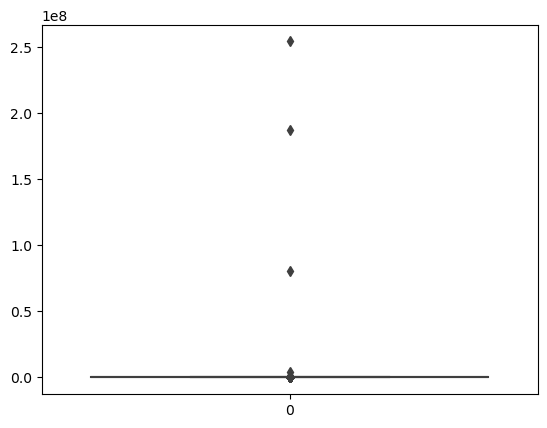

In [28]:
# Boxplot of SQUARE_FT
sns.boxplot(df["SQUARE_FT"])

In [29]:
q1=np.percentile(df["SQUARE_FT"], 25)
q3=np.percentile(df["SQUARE_FT"], 75)
IQR=q3-q1
lowerbound=q1-IQR*1.5
upperbound=q3+IQR*1.5
for i in df["SQUARE_FT"]:
    if i<lowerbound:
        df["SQUARE_FT"]=df["SQUARE_FT"].replace(i,lowerbound)
    elif i>upperbound:
        df["SQUARE_FT"]=df["SQUARE_FT"].replace(i,upperbound)
    else:
        continue

C:\Users\USER\AppData\Local\Temp\ipykernel_2636\2492656054.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SQUARE_FT"]=df["SQUARE_FT"].replace(i,upperbound)


<Axes: >

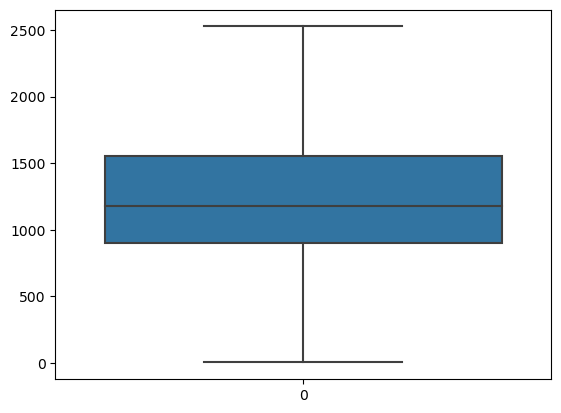

In [30]:
sns.boxplot(df["SQUARE_FT"])

<Axes: >

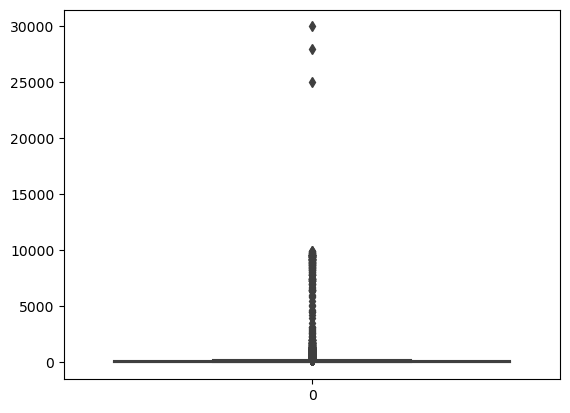

In [31]:
# Boxplot of TARGET(PRICE_IN_LACS)
sns.boxplot(df["TARGET(PRICE_IN_LACS)"])

In [32]:
q1=np.percentile(df["TARGET(PRICE_IN_LACS)"], 25)
q3=np.percentile(df["TARGET(PRICE_IN_LACS)"], 75)
IQR=q3-q1
lowerbound=q1-IQR*1.5
upperbound=q3+IQR*1.5
for i in df["TARGET(PRICE_IN_LACS)"]:
    if i<lowerbound:
        df["TARGET(PRICE_IN_LACS)"]=df["TARGET(PRICE_IN_LACS)"].replace(i,lowerbound)
    elif i>upperbound:
        df["TARGET(PRICE_IN_LACS)"]=df["TARGET(PRICE_IN_LACS)"].replace(i,upperbound)
    else:
        continue

C:\Users\USER\AppData\Local\Temp\ipykernel_2636\642849578.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TARGET(PRICE_IN_LACS)"]=df["TARGET(PRICE_IN_LACS)"].replace(i,upperbound)


<Axes: >

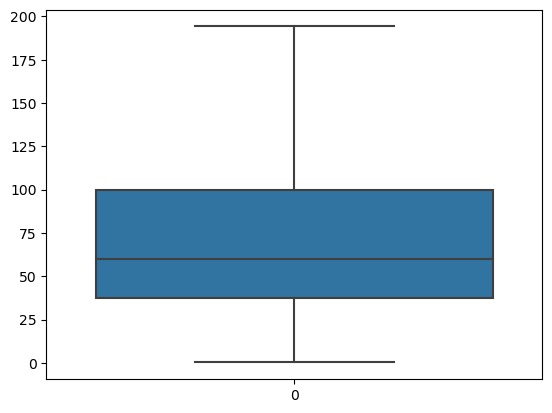

In [33]:
sns.boxplot(df["TARGET(PRICE_IN_LACS)"])

### EXPLORATORY DATA ANALYSIS[EDA]

### Univariate Analysis

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

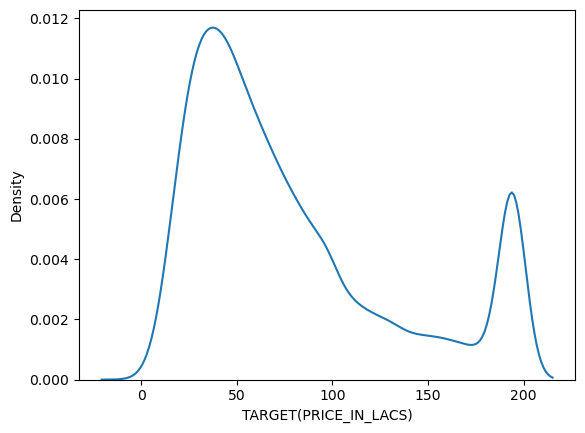

In [34]:
# kdeplot of TARGET(PRICE_IN_LACS)
sns.kdeplot(df["TARGET(PRICE_IN_LACS)"])

<Axes: xlabel='SQUARE_FT', ylabel='Density'>

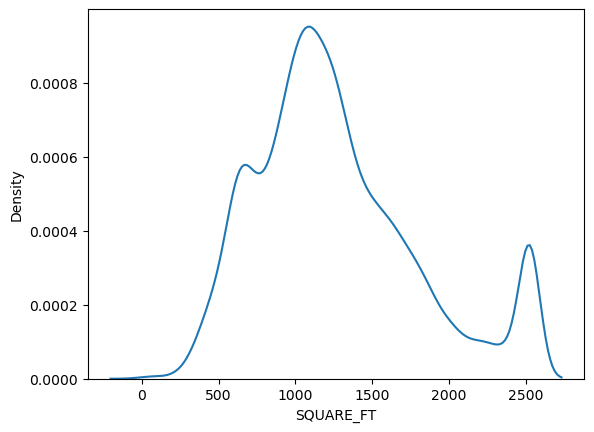

In [35]:
# kdeplot of SQUARE_FT
sns.kdeplot(df["SQUARE_FT"])

### Bivariate Analysis

<Axes: xlabel='RERA', ylabel='TARGET(PRICE_IN_LACS)'>

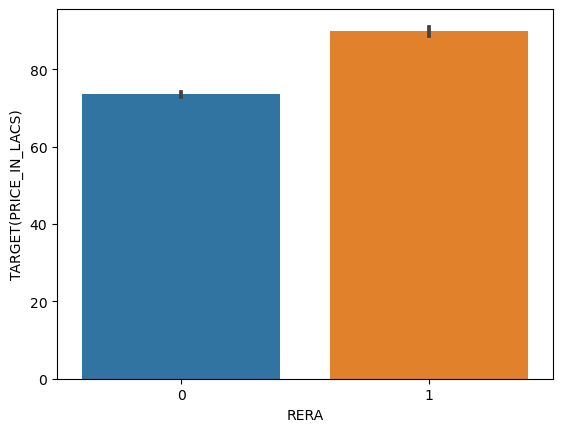

In [36]:
# Barplot of RERA and TARGET(PRICE_IN_LACS)
sns.barplot(x="RERA",y="TARGET(PRICE_IN_LACS)",data=df)

* From the above bar plot category one have the highest target price

<Axes: xlabel='BHK_NO.', ylabel='TARGET(PRICE_IN_LACS)'>

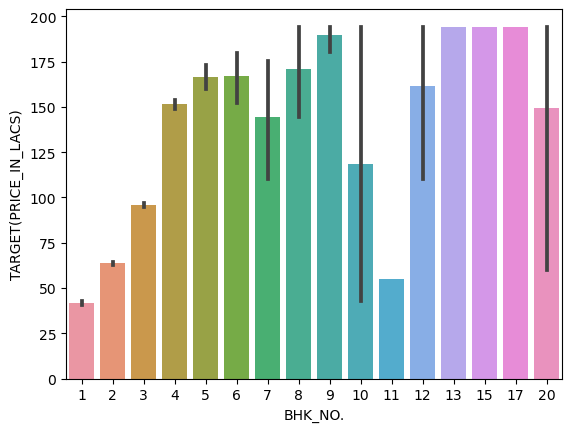

In [37]:
# Barplot of BHK_NO. and TARGET(PRICE_IN_LACS)
sns.barplot(x="BHK_NO.",y="TARGET(PRICE_IN_LACS)",data=df)

* BHK_NO. 9,13,15 and 17 shows the highest TARGET PRICE.
* BHK_NO. 1,2,3 and 11 shows the lowest TARGET PRICE.

<Axes: xlabel='BHK_OR_RK', ylabel='TARGET(PRICE_IN_LACS)'>

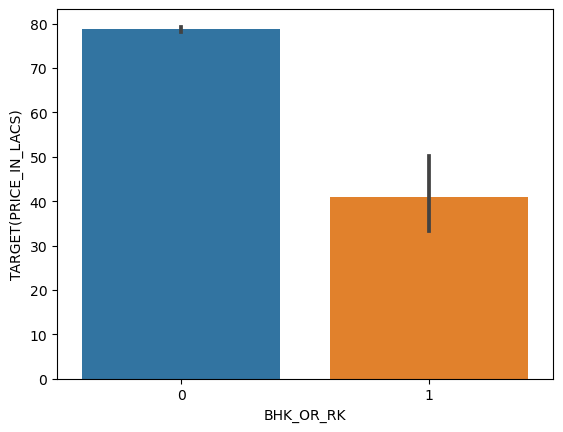

In [38]:
# Barplot of BHK_OR_RK and TARGET(PRICE_IN_LACS)
sns.barplot(x="BHK_OR_RK",y="TARGET(PRICE_IN_LACS)",data=df)

<Axes: xlabel='RESALE', ylabel='TARGET(PRICE_IN_LACS)'>

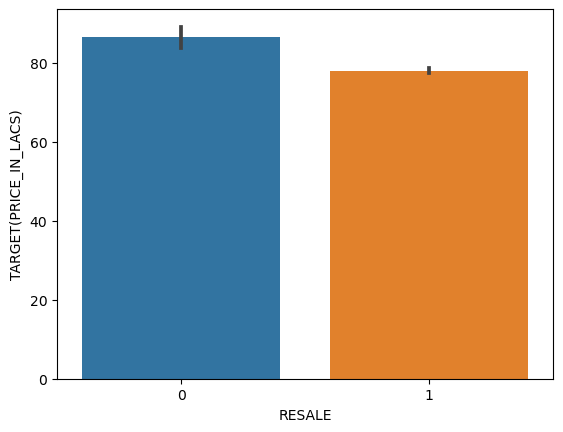

In [39]:
# Barplot of RESALE and TARGET(PRICE_IN_LACS)
sns.barplot(x="RESALE",y="TARGET(PRICE_IN_LACS)",data=df)

* The resaled properties are showing the lowest price.

In [40]:
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0
2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,0,0,1
3,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,0,0,1
4,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,0,0,1
29447,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,0,0,1
29448,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,0,1,0
29449,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,0,0,1


<Axes: xlabel='READY_TO_MOVE', ylabel='TARGET(PRICE_IN_LACS)'>

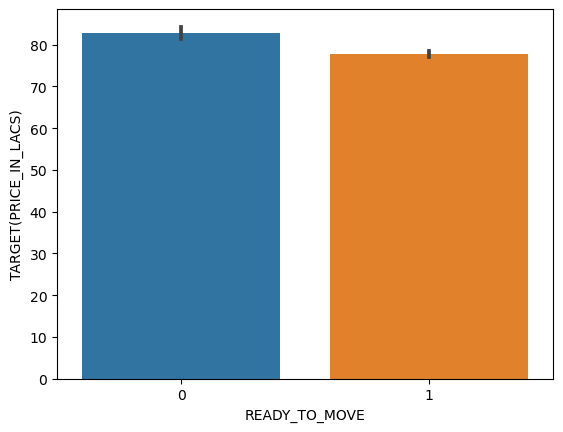

In [41]:
# Barplot of READY_TO_MOVE and TARGET(PRICE_IN_LACS)
sns.barplot(x="READY_TO_MOVE",y="TARGET(PRICE_IN_LACS)",data=df)

* Property which are not ready to move shows the highest price. 

<Axes: xlabel='UNDER_CONSTRUCTION', ylabel='TARGET(PRICE_IN_LACS)'>

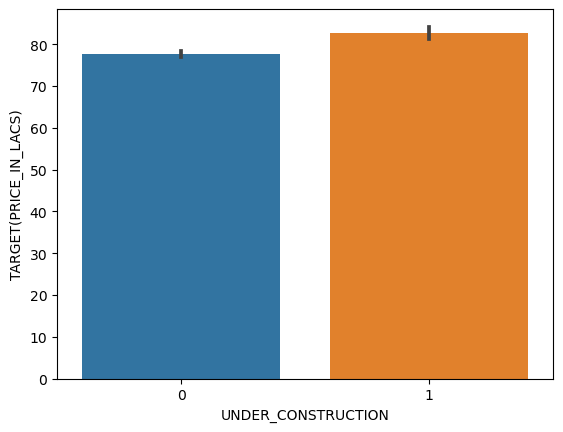

In [42]:
# Barplot of UNDER_CONSTRUCTION and TARGET(PRICE_IN_LACS)
sns.barplot(x="UNDER_CONSTRUCTION",y="TARGET(PRICE_IN_LACS)",data=df)

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

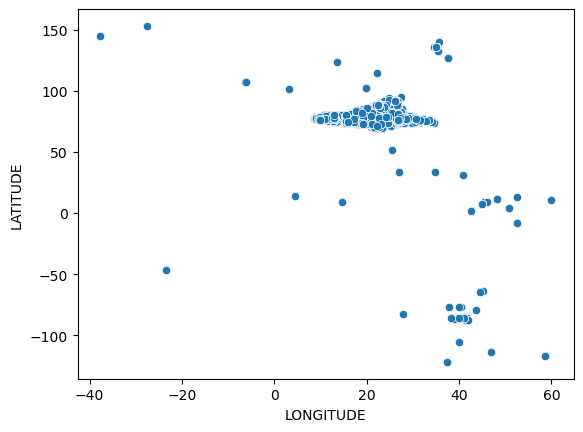

In [43]:
# Scatterplot of LONGITUDE and LATITUDE
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df)

* High density area of LATITUDE is 50 to 100 and the high density area of LONGITUDE is 0 to 40.

<Axes: xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>

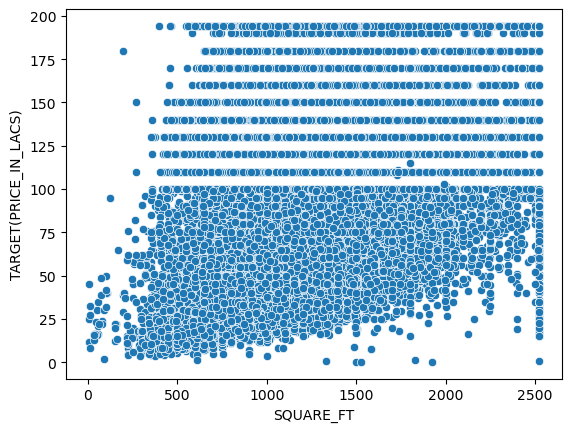

In [44]:
# Scatterplot of SQUARE_FT and TARGET(PRICE_IN_LACS)
sns.scatterplot(x="SQUARE_FT", y="TARGET(PRICE_IN_LACS)", data=df)

*  The above figure shows that there is a positive relation between SQUARE_FT and TARGET(PRICE_IN_LACS) till the ragnge 0 to 100

### Multivariate Analysis

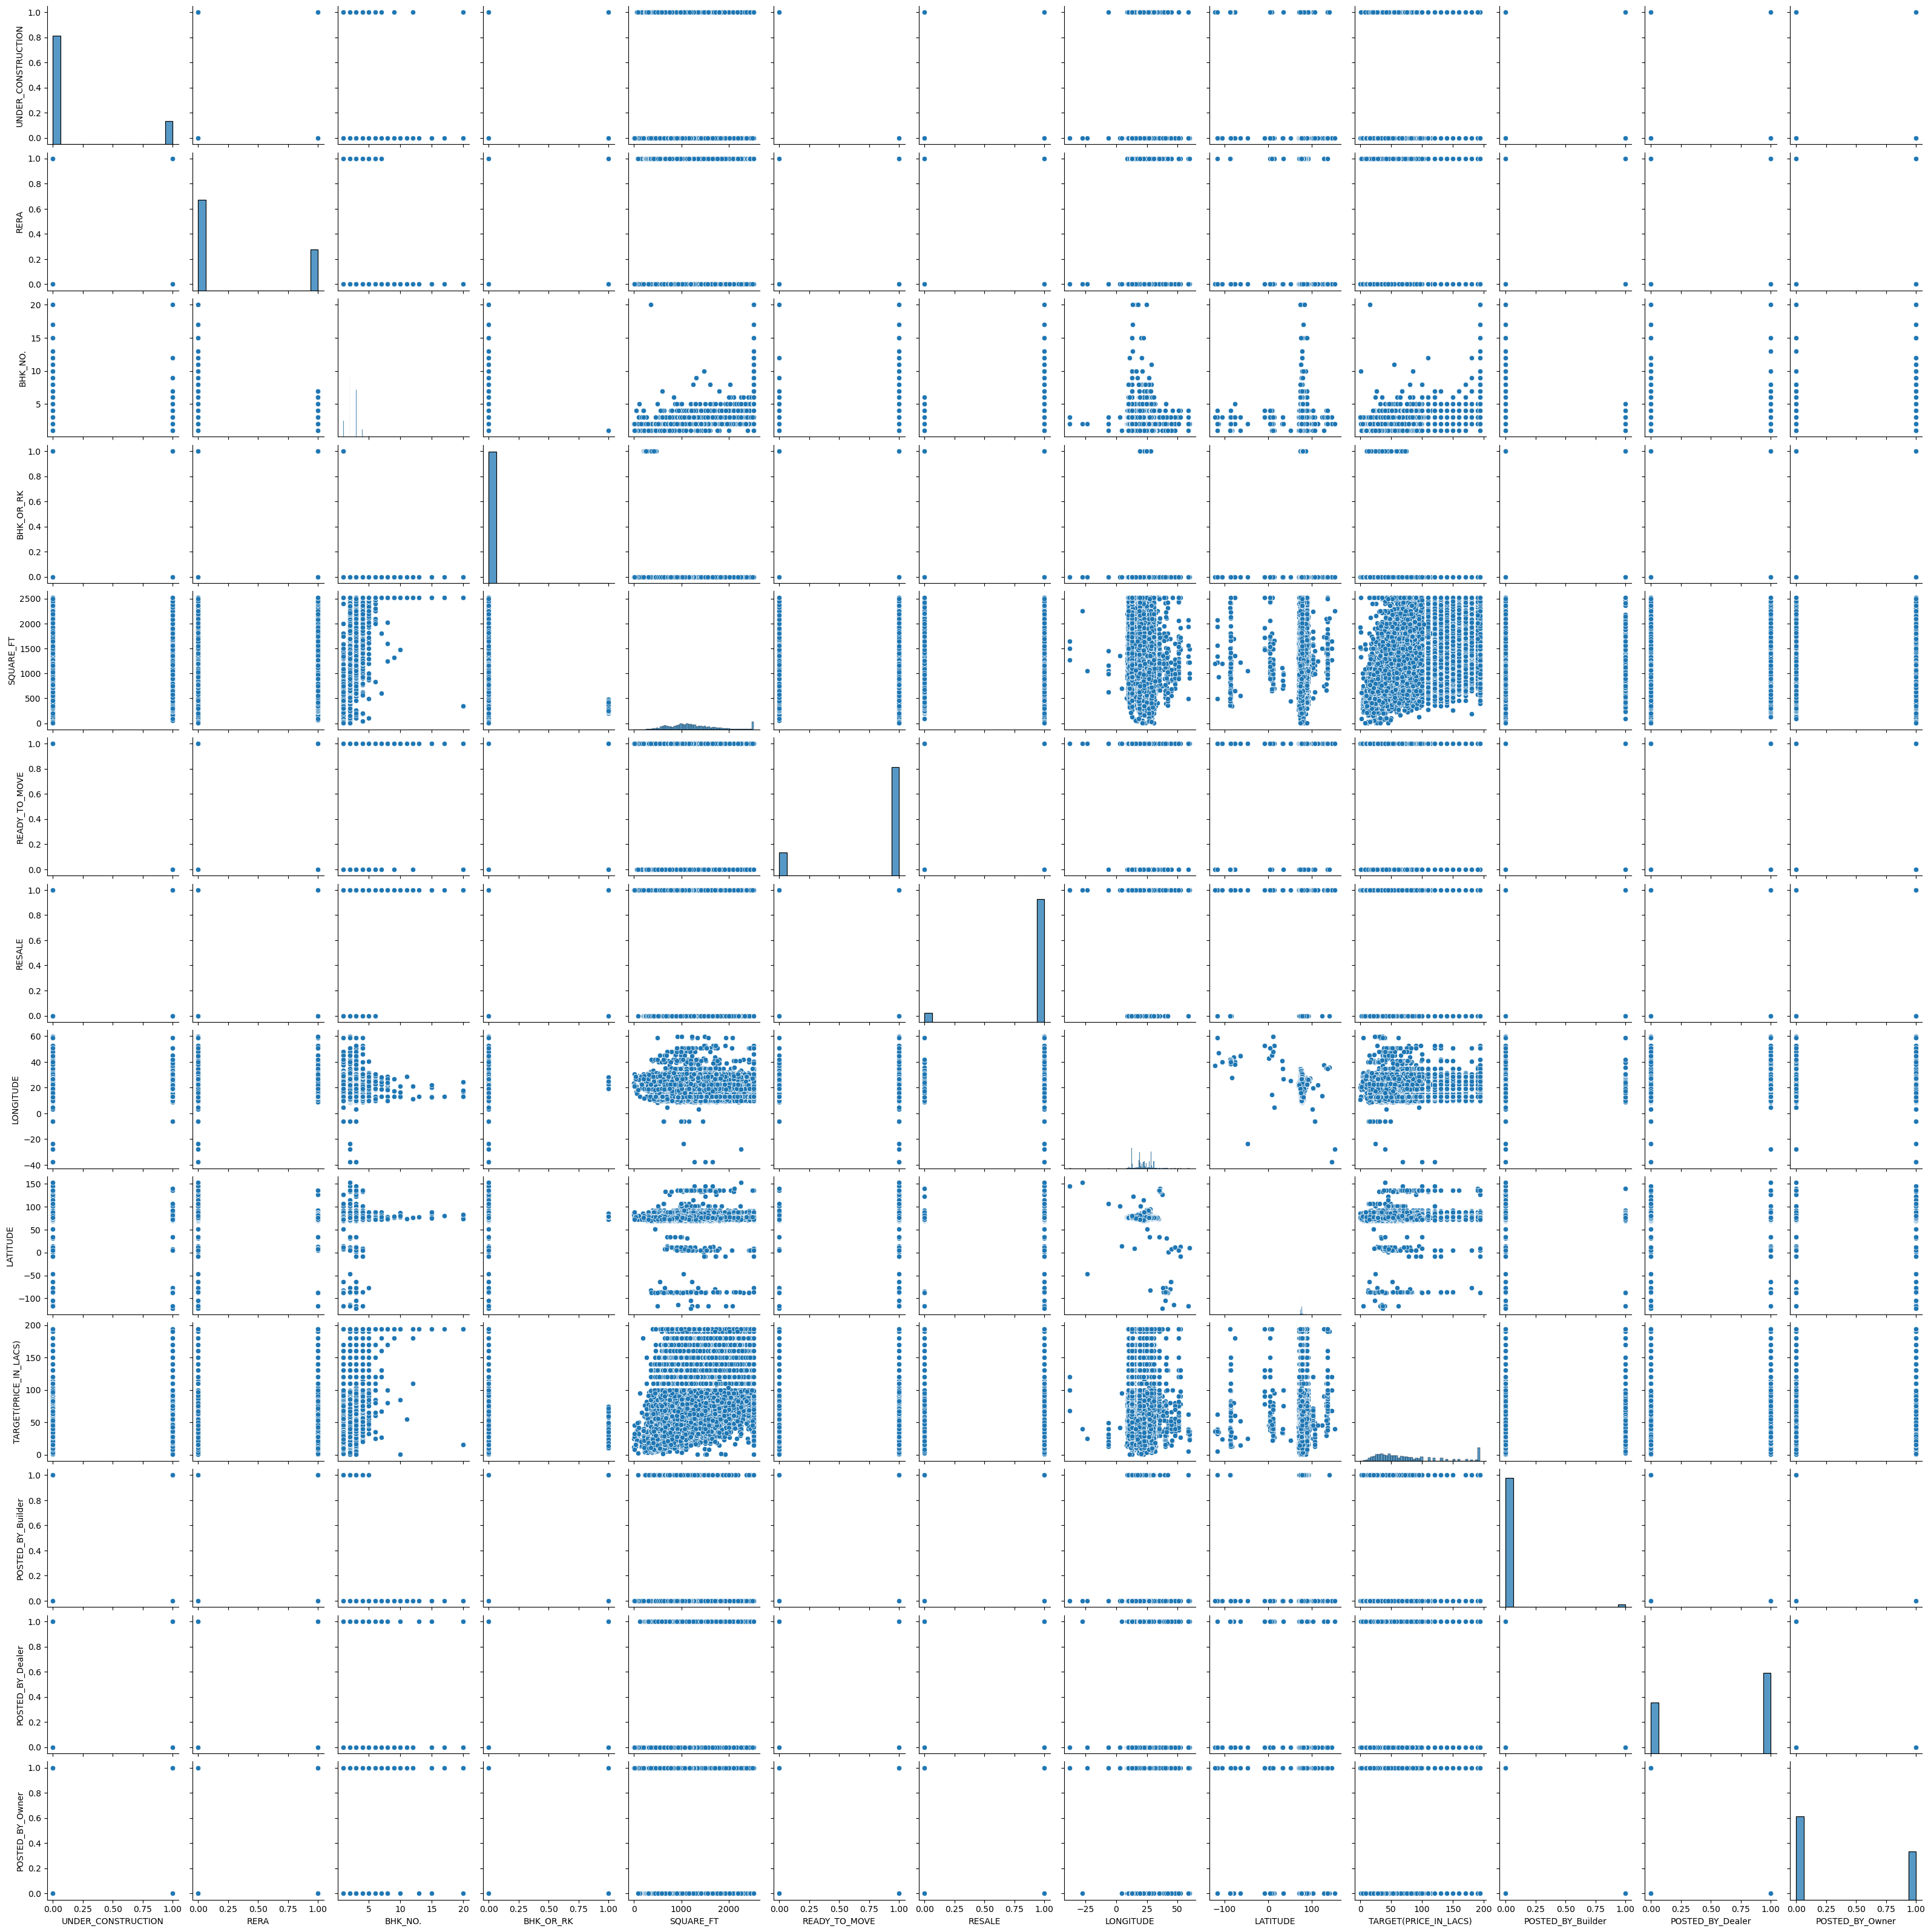

In [45]:
# Pairplot of the dataframe
sns.pairplot(df)

### Feature Engineering

<Axes: >

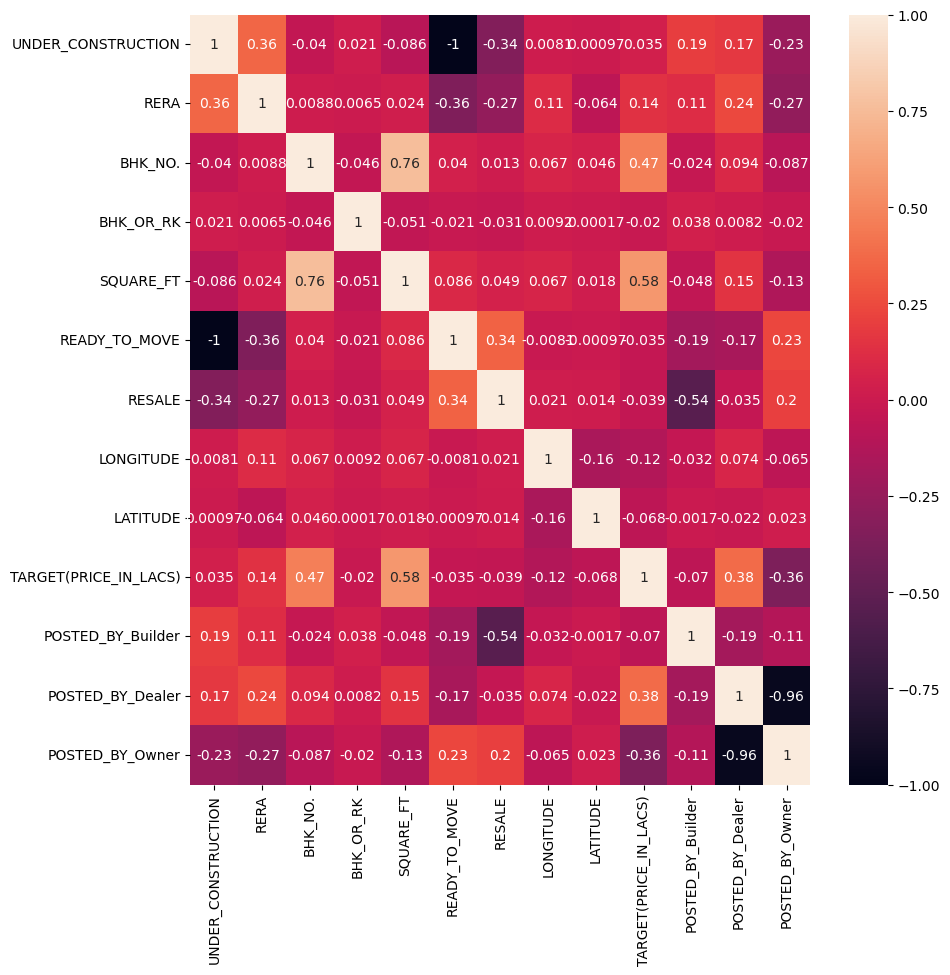

In [46]:
# heatmap of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

* From the above heatmap
 * SQUARE_FT and TARGET PRICE shows highly positive correlation with a pearson correlation coefficient of 0.58.
 * BHK_NO. and TARGET PRICE shows the positive correlation with pearson correlation coefficient of 0.47.
 * POSTED_BY_Dealer and TARGET PRICE also shows the positive correlation with pearson correlation coefficient of 0.38.
 * POSTED_BY_Owner and TARGET PRICE shows the negative correlation with pearson correlation coefficient of -0.36.
 * The model shows a multicollinearity. There is a positive relation between BHK_N0. and SQUARE_FT. So we consider only one of      them. 
 * Also there is a relation between POSTED_BY_Owner and POSTED_BY_Dealer, a negative correlation.

In [47]:
# Analyzing features and dropping columns
features=["SQUARE_FT","POSTED_BY_Dealer","LONGITUDE","LATITUDE","READY_TO_MOVE","RESALE","RERA","BHK_OR_RK"]
columnsdrop=["BHK_NO.","POSTED_BY_Owner","UNDER_CONSTRUCTION","POSTED_BY_Builder"]

In [48]:
for i in columnsdrop:
    df.drop (i, axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2636\1554180627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop (i, axis=1, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_2636\1554180627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop (i, axis=1, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_2636\1554180627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop (i, axis=1, inplace=True)
C:\U

In [49]:
df

,RERA,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer
0,0,0,1300.236407,1,1,12.969910,77.597960,55.0,0
1,0,0,1275.000000,1,1,12.274538,76.644605,51.0,1
2,0,0,933.159722,1,1,12.778033,77.632191,43.0,0
3,1,0,929.921143,1,1,28.642300,77.344500,62.5,0
4,0,0,999.009247,0,1,22.592200,88.484911,60.5,1
...,...,...,...,...,...,...,...,...,...
29446,0,0,2500.000000,1,1,27.140626,78.043277,45.0,0
29447,0,0,769.230769,1,1,39.945409,-86.150721,16.0,0
29448,0,0,1022.641509,1,1,26.928785,75.828002,27.1,1
29449,0,0,927.079009,1,1,12.900150,80.227910,67.0,0


### Model Building

In [50]:
# Splitting data into input featuers(x) and target variable(y)
x=df.drop(["TARGET(PRICE_IN_LACS)"], axis=1)

In [51]:
x

,RERA,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer
0,0,0,1300.236407,1,1,12.969910,77.597960,0
1,0,0,1275.000000,1,1,12.274538,76.644605,1
2,0,0,933.159722,1,1,12.778033,77.632191,0
3,1,0,929.921143,1,1,28.642300,77.344500,0
4,0,0,999.009247,0,1,22.592200,88.484911,1
...,...,...,...,...,...,...,...,...
29446,0,0,2500.000000,1,1,27.140626,78.043277,0
29447,0,0,769.230769,1,1,39.945409,-86.150721,0
29448,0,0,1022.641509,1,1,26.928785,75.828002,1
29449,0,0,927.079009,1,1,12.900150,80.227910,0


In [52]:
y=df["TARGET(PRICE_IN_LACS)"]

In [53]:
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 28566, dtype: float64

In [54]:
# splitting data into x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [55]:
x_train

,RERA,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer
15501,0,0,970.149254,1,1,28.588900,77.335200,1
3712,1,0,363.720074,0,0,26.832353,75.841749,0
22633,1,0,1249.917769,1,1,19.111438,72.878724,1
6941,1,0,353.034962,1,1,24.862517,78.282467,1
28593,0,0,1068.168576,1,1,12.918200,80.082400,0
...,...,...,...,...,...,...,...,...
11091,1,0,800.000000,1,1,19.639400,72.725600,1
17647,0,0,921.234454,1,1,19.235000,72.859800,1
5219,0,0,530.102234,1,1,18.936048,73.447077,0
12337,0,0,550.161812,1,1,28.210200,76.860600,1


In [56]:
x_train.shape

(22852, 8)

In [57]:
y_train

15501     52.0
3712       7.9
22633    190.0
6941      31.0
28593     55.0
         ...  
11091     24.4
17647    160.0
5219      14.0
12337     17.0
235       56.0
Name: TARGET(PRICE_IN_LACS), Length: 22852, dtype: float64

In [58]:
y_train.shape

(22852,)

In [59]:
lr=LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred=lr.predict(x_test)

In [70]:
lr.predict([[2,3,4,5,6,7,8,10]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([382.86244122])

#### MODEL VALIDATION

In [71]:
r2=r2_score(y_test,y_pred)

In [72]:
r2

0.46413991719733794

In [74]:
mse=mean_squared_error(y_test,y_pred)

In [75]:
mse

1590.5030340534922